In [47]:

import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# single file
fpath = 'C:\Master\data\sCoast_surface_data/SINMOD_samp.nc'
ds = xr.open_dataset(fpath)

lat = ds.gridLats
lon = ds.gridLons

#test = sst.isel(xc=0, yc=0)
#test = sst.isel(time=0)
#print(test)
#test.plot()
#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,3))
#test.plot.scatter()

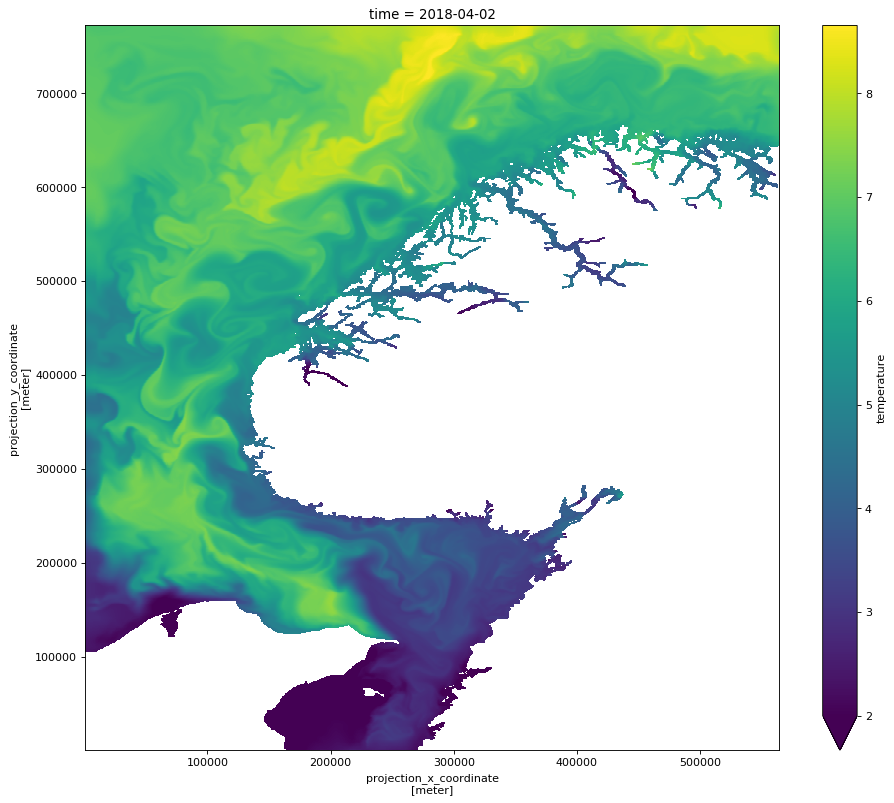

In [12]:
sst = ds.temperature[0] 
sst_masked = sst.where(sst > -1e+4)

fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='w')
sst_masked.plot(vmin=2)

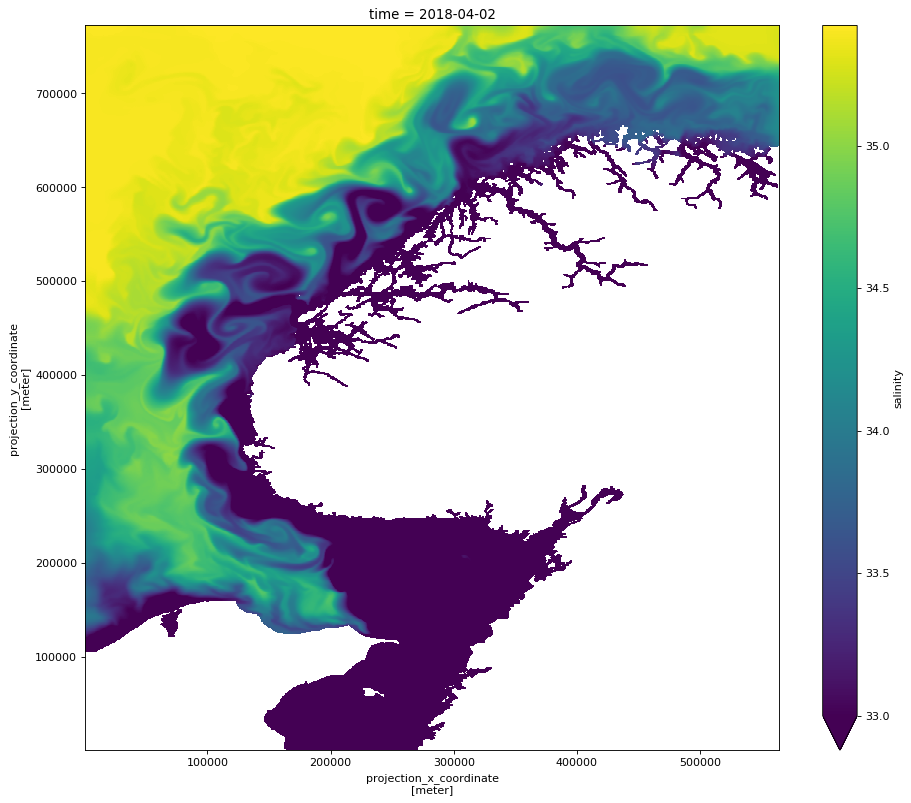

In [20]:
salinity = ds.salinity[0] 
salinity_masked = salinity.where(sst > -1e+4)
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
salinity_masked.plot(vmin=33)

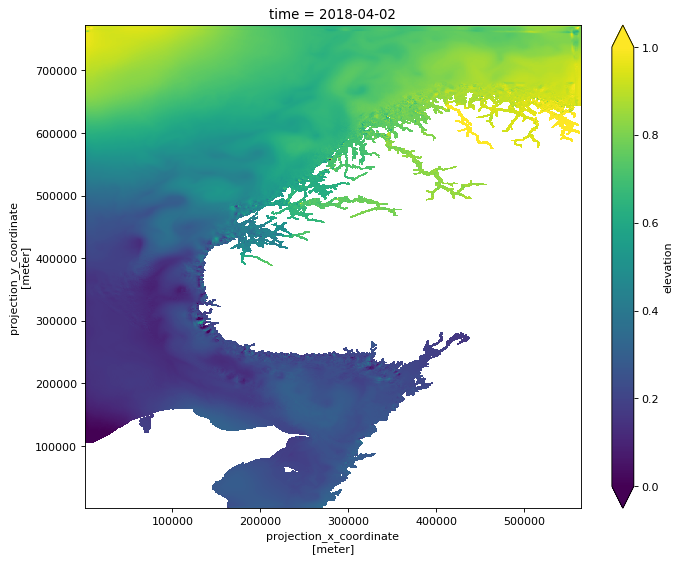

In [51]:
elevation = ds.elevation[0] 
elevation_masked = elevation.where(sst > -1e+4)
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
#elevation_masked.coords['gridLats'] = lat
elevation_masked.plot.pcolormesh(vmin=0, vmax=1)#, x='gridLons', y='gridLats')

In [46]:
lon

<xarray.DataArray 'gridLats' (yc: 965, xc: 705)>
[680325 values with dtype=float32]
Coordinates:
  * xc       (xc) float32 800.0 1600.0 2400.0 ... 562400.0 563200.0 564000.0
  * yc       (yc) float32 800.0 1600.0 2400.0 ... 770400.0 771200.0 772000.0
Attributes:
    SINMODVarID:          21
    units:                degrees_north
    standard_name:        latitude
    axis:                 Y
    _CoordinateAxisType:  Lat

In [45]:
ds

<xarray.Dataset>
Dimensions:                    (time: 3821, xc: 705, yc: 965, zc: 1)
Coordinates:
  * time                       (time) datetime64[ns] 2018-04-02 ... 2018-09-08T04:00:00
  * xc                         (xc) float32 800.0 1600.0 ... 563200.0 564000.0
  * yc                         (yc) float32 800.0 1600.0 ... 771200.0 772000.0
  * zc                         (zc) float32 3.0
Data variables:
    grid_mapping               int32 ...
    LayerDepths                (zc) float32 ...
    depth                      (yc, xc) float32 ...
    DXxDYy                     (yc, xc) float32 ...
    gridLats                   (yc, xc) float32 ...
    gridLons                   (yc, xc) float32 ...
    u-velocity                 (time, yc, xc) float32 ...
    v-velocity                 (time, yc, xc) float32 ...
    temperature                (time, yc, xc) float32 ...
    salinity                   (time, yc, xc) float32 ...
    elevation                  (time, yc, xc) float32 ...
    u-wind                     (time, yc, xc) float32 ...
    v-wind                     (time, yc, xc) float32 ...
    u-bottom                   (time, yc, xc) float32 ...
    v-bottom                   (time, yc, xc) float32 ...
    ice-thickness              (time, yc, xc) float32 ...
    ice-compactness            (time, yc, xc) float32 ...
    u-ice                      (time, yc, xc) float32 ...
    v-ice                      (time, yc, xc) float32 ...
    salinity-ice               (time, yc, xc) float32 ...
    ice-melt-rate              (time, yc, xc) float32 ...
    ice-prod-rate              (time, yc, xc) float32 ...
    IceVFluxX                  (time, yc, xc) float32 ...
    IceVFluxY                  (time, yc, xc) float32 ...
    IceAFluxX                  (time, yc, xc) float32 ...
    IceAFluxY                  (time, yc, xc) float32 ...
    SST                        (time, yc, xc) float32 ...
    Lsalmonis Total Plankton   (time, yc, xc) float32 ...
    Lsalmonis Nauplii stages   (time, yc, xc) float32 ...
    Lsalmonis Infective stage  (time, yc, xc) float32 ...
Attributes:
    grid_mapping_name:                      polar_stereographic
    title:                                  Current data from SINMOD
    institution:                            SINTEF Ocean
    grid_mapping:                           grid_mapping
    straight_vertical_longitude_from_pole:  58.0
    horizontal_resolution:                  800.0
    coordinate_north_pole:                  [3481.  3053.5]
    latitude_of_projection_origin:          90.0
    standard_parallel:                      60.0
    barotropic_timestep:                    2.6666666666666665
    baroclinic_timestep:                    72.0
    _FillValue:                             -32768
    setup:                                  sCoast
    relax_e:                                T
    nested:                                 T
    tidal_input:                            F
    DHA:                                    1.0
    smagorin:                               T
    biharmonic:                             F
    KBi:                                    6000000.0
    COLDSTART:                              F
    ATMODATA:                               4
    CM:                                     1.0
    CM2D:                                   1.0
    CH:                                     0.3
    CI:                                     5.0
    icedyn:                                 F
    tidal_components:                       [0 0 0 0 0 0 0 0 0 0 0]

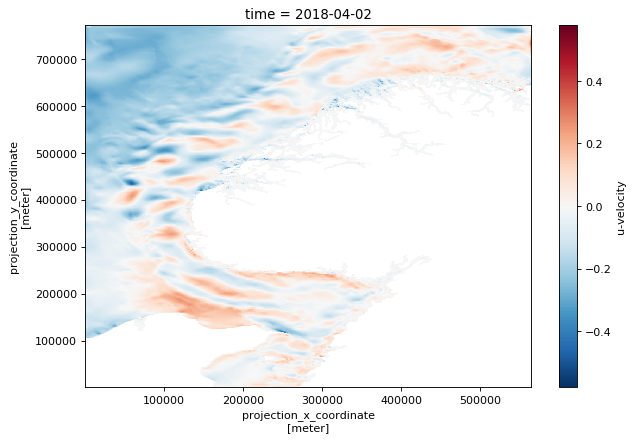

In [73]:
u = ds['u-velocity'][0]
u_masked = u.where(sst > -1e+4)
fig=plt.figure(figsize=(9,6), dpi= 80, facecolor='w', edgecolor='k')
u_masked.plot()

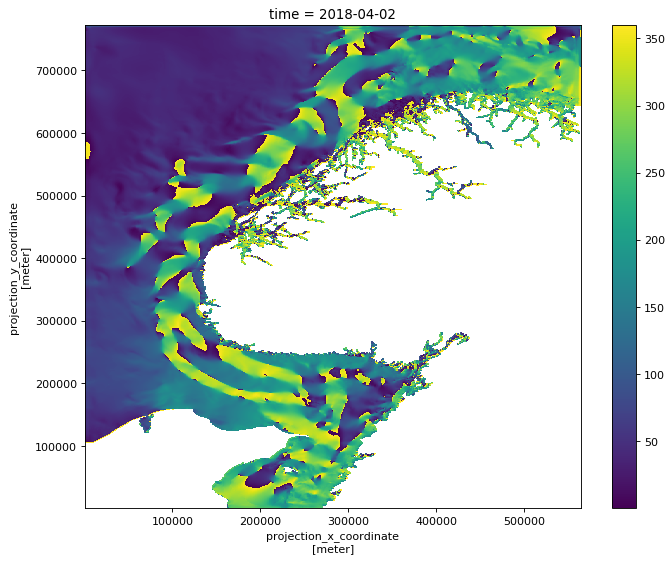

In [91]:


u = ds['u-velocity'][0]
v = ds['v-velocity'][0]
u_masked = u.where(u > -1e+4)
v_masked = v.where(v > -1e+4)

with np.errstate(all='ignore'):
    phase_angle = xr.ufuncs.rad2deg( xr.ufuncs.arctan2(v_masked, u_masked) ) + 180
    
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
phase_angle.plot()


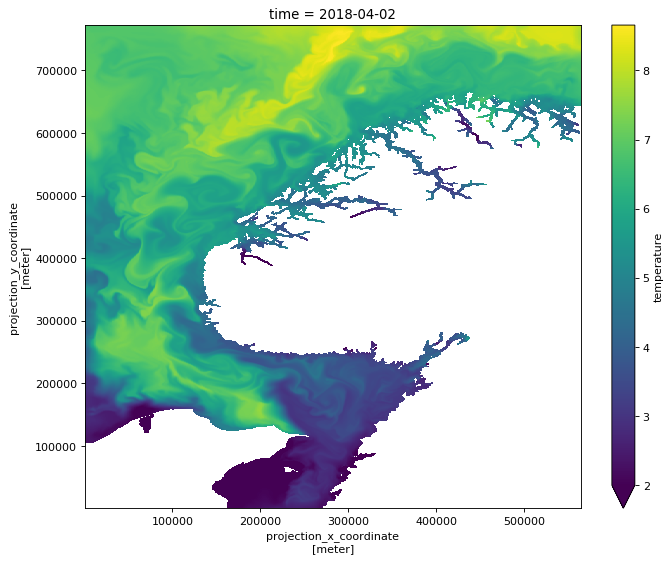

In [90]:
sst = ds.temperature[0] 
sst_masked = sst.where(sst > -1e+4)

fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='w')
sst_masked.plot(vmin=2)

In [79]:
v_masked

<xarray.Dataset>
Dimensions:      (time: 3821, xc: 705, yc: 965)
Coordinates:
  * time         (time) datetime64[ns] 2018-04-02 ... 2018-09-08T04:00:00
  * xc           (xc) float32 800.0 1600.0 2400.0 ... 562400.0 563200.0 564000.0
  * yc           (yc) float32 800.0 1600.0 2400.0 ... 770400.0 771200.0 772000.0
Data variables:
    temperature  (yc, xc, time) float32